# Tarefa 02
Nesta tarefa vocês irão projetar duas arquiteturas de CNN utilizando os conceitos, camadas e técnicas vistas no curso. As redes serão treinadas no dataset CIFAR-10 e depois comparadas. As tarefas são:

**1) Definir as arquiteturas; ----> 0.3 pontos** 

- Quantas [camadas](https://keras.io/layers/core/) ela terá?
- Quais as operações utilizadas (convoluções, pooling, fully-connected)?
- Quais serão os parâmetros de cada camada (número e tamanho dos filtros convolucionais, stride, tamanho do pooling, funções de ativação)?
- Que tipo de [inicialização](https://keras.io/initializers/) de pesos você utilizará?
- Haverá dropout? Qual a taxa de dropout? 
- Haverá [regularização](https://keras.io/regularizers/)? Qual a taxa do regularizador?

**2) Definir como será o treino; ----> 0.25 pontos**
- Número de épocas e tamanho do batch (deixe igual p/ as duas redes);
- [Otimizador](https://keras.io/optimizers/);
- [Função de custo](https://keras.io/losses/);

**3) Classificar o conjunto de teste e comparar os resultados; ----> 0.25 pontos**
- Classificar imagens de teste;
- Comparar acurácias;
- Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 
    
**4) Escrever um parágrafo com as suas conclusões; ----> 0.2 pontos**

-----

## CIFAR-10
Este conjunto de dados é composto de 60000 imagens coloridas de dimensões 32x32, divididas em 10 classes (com 6000 imagens por classe), sendo 50000 para treinamento e 10000 para teste. As classes do CIFAR-10 são **aviões, automóveis, pássaros, gatos, alces, cachorros, sapos, cavalos, navios, caminhões.**

O código abaixo carrega e transforma os dados de entrada para ficarem prontos para serem treinados/classificados pela sua rede. Os conjuntos de treino, validação e teste estão balanceados, portanto a acurácia já estará normalizada nos métodos do Keras.  

In [1]:
#Imports
import os
import numpy as np
from random import seed
seed(42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

from keras.datasets import cifar10
from keras.utils import np_utils
from sklearn.cross_validation import StratifiedShuffleSplit


#Load data
(trainVal_data, trainVal_label), (X_test, y_test) = cifar10.load_data()

#Split trainVal data into train and val sets (already balanced)
splitIdx = StratifiedShuffleSplit(trainVal_label, 1, test_size=10000, random_state=0)
for train_index, val_index in splitIdx:
    X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
    y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]
    
    
#Transform data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_val.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training matrix shape (40000, 32, 32, 3)
Validation matrix shape (10000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)


--------
--------
--------
**A tarefa de vocês começa aqui!!!**

ALUNOS:
ANDERSON ROCHA
FELIPE PEREIRA

# Definir as duas arquiteturas - [0.3 pontos]
***Não se esqueçam de***:
    - Importar as camadas utilizadas e o tipo do modelo (Sequential);
    - Passar o input_shape na primeira camada da rede;
    - Utilizar ativação `softmax` na última camada densa da rede;

In [2]:
#Imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
import numpy as np

In [3]:
# Define 1st architecture
modelOne = Sequential()

#Método de inicialização: GLOROT
modelOne.add(Dense(64, input_shape=(32,32,3), activation='relu', kernel_initializer = 'glorot_uniform'))

#Feature selection: CONV2D
modelOne.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))

#Feature selection: MAXPOOLING
modelOne.add(MaxPooling2D(pool_size=(2,2)))

#Feature selection: CONV2D
modelOne.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))

#Feature selection: MAXPOOLING
modelOne.add(MaxPooling2D(pool_size=(2,2)))

#Regularização: FLATTEN e DROPOUT 
modelOne.add(Flatten())
modelOne.add(Dropout(0.25))

#Fully-connected: NN
modelOne.add(Dense(100, activation='relu'))
modelOne.add(Dense(50, activation='relu'))

#Classificação
modelOne.add(Dense(10, activation='softmax'))

#Compilação
#Hiper-parâmetros: Optimizer(Adam),  Loss(Categorical Crossentropy) e Metrics(Accuracy)
modelOne.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Define 2nd architecture
modelTwo = Sequential()

#Método de inicialização: RANDOM
modelTwo.add(Dense(64, input_shape=(32,32,3), activation='relu', kernel_initializer = 'random_uniform'))

#Feature selection: CONV2D
modelTwo.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))

#Feature selection: MAXPOOLING
modelTwo.add(MaxPooling2D(pool_size=(2,2)))

#Regularização: FLATTEN e DROPOUT 
modelTwo.add(Flatten())
modelTwo.add(Dropout(0.5))

#Fully-connected: NN
modelTwo.add(Dense(100, activation='relu'))

#Classificação
modelTwo.add(Dense(10, activation='softmax'))

#Compilação
#Hiper-parâmetros: Optimizer(RMSPROP),  Loss(Categorical Crossentropy) e Metrics(Accuracy)
modelTwo.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


# Treinamento - [0.25 pontos]
***Não se esqueçam de***:
    - Escolher otimizador e loss;
    - Compilar o modelo;
    - Definir número de épocas, tamanho do batch (utilizar o mesmo para ambas as redes);
    - Passar o conjunto de validação em `validation_data`;

In [5]:
#train 
historyListOne = []
historyListOne.append(
modelOne.fit(X_train, Y_train,
          batch_size=128, epochs=5, verbose=1,          
          validation_data=(X_val, Y_val))
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 215s 5ms/step - loss: 1.9633 - acc: 0.2707 - val_loss: 1.7413 - val_acc: 0.3586
Epoch 2/5
40000/40000 [==============================] - 202s 5ms/step - loss: 1.7158 - acc: 0.3663 - val_loss: 1.6321 - val_acc: 0.4093
Epoch 3/5
40000/40000 [==============================] - 203s 5ms/step - loss: 1.6445 - acc: 0.3941 - val_loss: 1.5701 - val_acc: 0.4279
Epoch 4/5
40000/40000 [==============================] - 212s 5ms/step - loss: 1.6089 - acc: 0.4069 - val_loss: 1.5896 - val_acc: 0.4152
Epoch 5/5
40000/40000 [==============================] - 209s 5ms/step - loss: 1.5948 - acc: 0.4171 - val_loss: 1.5626 - val_acc: 0.4229


In [10]:
#train 
historyListTwo = []
historyListTwo.append(
modelTwo.fit(X_train, Y_train,
          batch_size=128, epochs=5, verbose=1,          
          validation_data=(X_val, Y_val))
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 193s 5ms/step - loss: 1.8902 - acc: 0.3221 - val_loss: 1.6627 - val_acc: 0.4247
Epoch 2/5
40000/40000 [==============================] - 200s 5ms/step - loss: 1.6032 - acc: 0.4330 - val_loss: 1.5781 - val_acc: 0.4466
Epoch 3/5
40000/40000 [==============================] - 196s 5ms/step - loss: 1.4836 - acc: 0.4713 - val_loss: 1.4308 - val_acc: 0.4981
Epoch 4/5
40000/40000 [==============================] - 198s 5ms/step - loss: 1.4159 - acc: 0.4944 - val_loss: 1.3268 - val_acc: 0.5325
Epoch 5/5
40000/40000 [==============================] - 202s 5ms/step - loss: 1.3669 - acc: 0.5119 - val_loss: 1.3549 - val_acc: 0.5218


# Resultados no conjunto de teste [0.25 pontos]
***Não se esqueçam de***:
    - Classificar as imagens do conjunto de teste utilizando cada rede;
    - Computar acurácia para cada rede;
    - Comparar ambas as acurácias;
    - Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 

In [8]:
#Plot func
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

def plot_loss_accuracy(history, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']

    #Plot Loss
    plt.subplot(2, 1, 1)

    for idx,hist in enumerate(historyListOne):
        if plotSet in ["train", "both"]:
            plt.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_loss' in hist.history.keys() and plotSet in ["test", "both"]:
            plt.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)])

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title("Loss")    
    plt.legend(legend, loc='best')    

    #Plot ACC
    plt.subplot(2, 1, 2)
    for idx,hist in enumerate(historyListOne):    
        if plotSet in ["train", "both"]:
            plt.plot(hist.history['acc'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_acc' in hist.history.keys() and plotSet in ["test", "both"]:
            plt.plot(hist.history['val_acc'], linestyle=linestyles[idx%len(linestyles)])

    plt.ylabel('ACC')
    plt.xlabel('Epoch')
    plt.title("ACC")   
    plt.legend(legend, loc='best')    

    plt.show()

Test loss Model One: 1.5625673267364502
Accuracy Model One:  0.4229


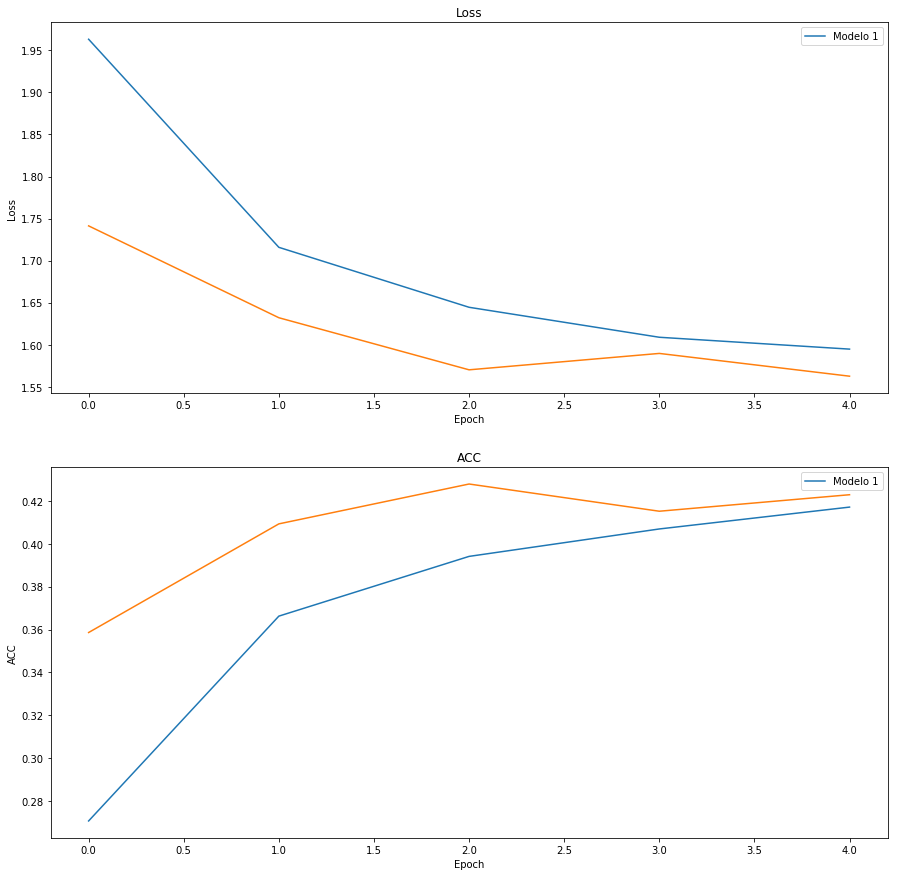

In [9]:
#Evaluation
scoresOne = modelOne.evaluate(X_val, Y_val, verbose=0)
print('Test loss Model One:', scoresOne[0])
print("Accuracy Model One: ", scoresOne[1])

#Plot
legend = ["Modelo 1"]
plot_loss_accuracy(historyListOne, legend)

In [11]:
#Plot func
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

def plot_loss_accuracy(history, legend, plotSet="both"):
    linestyles = ['-', '--', ':', '-.']

    #Plot Loss
    plt.subplot(2, 1, 1)

    for idx,hist in enumerate(historyListTwo):
        if plotSet in ["train", "both"]:
            plt.plot(hist.history['loss'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_loss' in hist.history.keys() and plotSet in ["test", "both"]:
            plt.plot(hist.history['val_loss'], linestyle=linestyles[idx%len(linestyles)])

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title("Loss")    
    plt.legend(legend, loc='best')    

    #Plot ACC
    plt.subplot(2, 1, 2)
    for idx,hist in enumerate(historyListTwo):    
        if plotSet in ["train", "both"]:
            plt.plot(hist.history['acc'], linestyle=linestyles[idx%len(linestyles)])
        if 'val_acc' in hist.history.keys() and plotSet in ["test", "both"]:
            plt.plot(hist.history['val_acc'], linestyle=linestyles[idx%len(linestyles)])

    plt.ylabel('ACC')
    plt.xlabel('Epoch')
    plt.title("ACC")   
    plt.legend(legend, loc='best')    

    plt.show()

Test loss Model Two: 1.3549285877227784
Accuracy Model Two:  0.5218


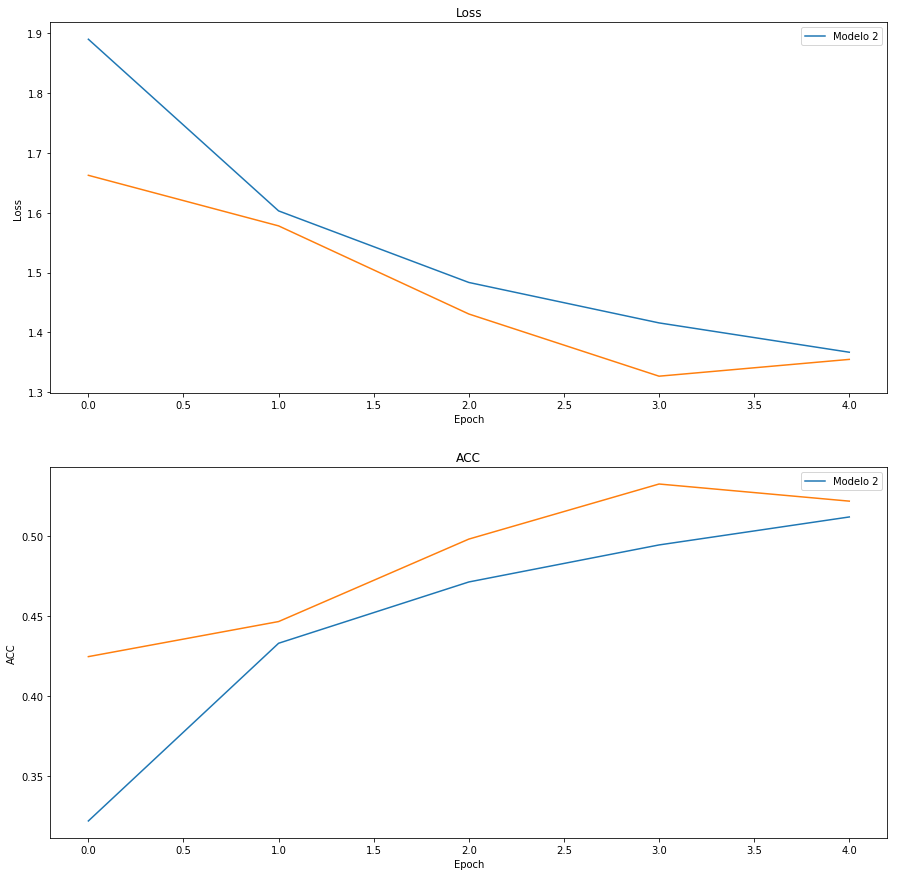

In [12]:
#Evaluation
scoresTwo = modelTwo.evaluate(X_val, Y_val, verbose=0)
print('Test loss Model Two:', scoresTwo[0])
print("Accuracy Model Two: ", scoresTwo[1])

#Plot
legend = ["Modelo 2"]
plot_loss_accuracy(historyListTwo, legend)

# Conclusões [0.2 pontos]
Escrevam um parágrafo com as conclusões que vocês tiraram na tarefa. Comentem as diferenças entre as duas arquiteturas e em seus treinamentos, apontando a motivação pelas decisões tomadas. Se o resultado ficou melhor/pior do que o que você esperava, o que você acha que pode ter acontecido?

In [ ]:
# Write your paragraph here!

O intuito de montar 2 redes foi para testar os diferentes parâmetros e arquiteturas, afim de verificar como estas escolhas influenciam no resultado.

Para a primeira arquitetura, nos baseamos na ideia da AlexNet.

A primeira parte foi uma camada Dense, que recebe o input, utiliza relu para ativação e iniciou o kernel com gorot.

Com a parte de Feature Selection, utilizando Convolução e Pooling, fizemos esta dupla operação apenas 2 vezes, reduzindo a imagem inicial de 32x32x3 para 8x8x3. Não reduzimos mais, pois achamos que o resultado da convolução seria muito pequeno em termos de parâmetros.

Após estas camadas, aplicamos a regularização com Flatten e Dropout. Em exercícios anteriores usamos Dropout 0.25 ou 0.50, então o modelo 1 utilizou dropout 0.25 e o modelo 2 0.50.

Depois disso, vieram as camadas fully connected, compostas por 2 Denses. A ideia foi montar um "funil", com a primeira camada com 100 neurônios e a segunda com 50 neurônios. Ambos com ativação relu.

A camada seguinte, de classificação, foi composta por uma Dense de 10 neurônios com ativação Softmax para realizar a classificação.

A segunda arquitetura é bem parecida com a primeira e trouxe algumas modificações justamente para verificarmos a diferença no resultado final.

A primeira diferença é a inicialização do kernel, com random.

A segunda é a quantidade de camadas com Convolução e Pooling, apenas 1 camada de cada. Fizemos isso para deixar o resultado com mais parâmetros (16x16x3) do que a do modelo 1 (8x8x3).

Foi aplicado flatten e dropout para regularização, com dropout em 0.5, para testar sua eficiência.

Na camada fully connected, também abrimos mão da "arquitetura de funil", aplicando apenas uma rede de 100 neurônios.

A camada de classificação, com 10 neurônios referentes às 10 classes, com ativação softmax é a mesma nas 2 arquiteturas.

Houve uma diferença também na compilação dos modelos. Para o modelo 1 foi utilizad o otimizador Adam, enquanto no Modelo 2 foi utlizado o RMSprop.

Loss e Metrics foram as mesmas para manter a comparação entre os modelos.

Indo para a parte "divertida", no treinamento, o Modelo 1 obteve 41.71% de acurácia e o Modelo 2 obteve 51.19% de acurácia. Essa diferença se manteve no conunto de validação, onde o Modelo 1 obteve 42.29% de acurácia e o Modelo 2 51.19% de acurácia.

O modelo 2 ficou melhor, em nossa opinição, por possuir menos camadas de convolução, o que acabou entregando um mapa de ativação maior para a camada fully connected, que, com isso, pode fazer um trabalho melhor de criação do modelo. Esta diferença também pode estar relacionada ao uso do RMSprop para otimização, visto que ele é mais moderno que o Adam para ajustar o Learning Rate.

Utilizamos apenas 5 épocas por causa do tempo de execução.
